# Task 5: Interactive Business Dashboard in Streamlit

**Objective:**  
Develop an interactive dashboard for analyzing sales, profit, and segment-wise performance.

**Dataset:**  
Global Superstore Dataset

**Key Instructions:**
- Cleaned and prepare the dataset
- Open terminal in same folder as the notebook and run "streamlit run Dashboard.py" in terminal
- Built a Streamlit dashboard with filters (Region, Category, Sub-Category)  
- Display KPIs using visual charts:
  - Total Sales  
  - Profit  
  - Top 5 Customers by Sales

### **Dataset**

**Dataset Name**: Global Superstore Dataset
**Source**: Kaggle 

**Target Variable**: Sales


### **Features**:

* **Row ID** – Unique row number for each record.
* **Order ID** – Unique identifier for each order transaction.
* **Order Date** – Date on which the order was placed.
* **Ship Date** – Date on which the product was shipped.
* **Ship Mode** – Type of shipping (e.g., First Class, Standard Class, Second Class, Same Day).
* **Customer ID** – Unique identifier for a customer.
* **Customer Name** – Full name of the customer.
* **Segment** – Customer segment (e.g., Consumer, Corporate, Home Office).
* **Country** – Country where the order was placed.
* **City** – City of the customer or delivery.
* **State** – State/province of the customer or delivery.
* **Postal Code** – ZIP/Postal code of the customer.
* **Region** – Geographical region (East, West, Central, South).
* **Product ID** – Unique identifier for each product.
* **Category** – Broad product category (Furniture, Office Supplies, Technology).
* **Sub-Category** – More detailed product category (e.g., Chairs, Phones, Binders).
* **Product Name** – Name or description of the product.
* **Sales** – Revenue generated from the transaction.
* **Quantity** – Number of product units sold.
* **Discount** – Discount offered on the product (0 to 1 range).
* **Profit** – Net profit gained from the transaction.

In [1]:
#Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
#Load dataset into a DataFrame
df = pd.read_csv("Global_Superstore.csv")

In [4]:
#Summarizing the Dataset structure
print("Dataset Shape:", df.shape)
print("Column Names:", df.columns.tolist())
print("\nFirst 5 Rows:")
df.head()

Dataset Shape: (51290, 24)
Column Names: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country', 'Postal Code', 'Market', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority']

First 5 Rows:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-12,31-07-12,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-13,07-02-13,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-13,18-10-13,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-13,30-01-13,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-13,06-11-13,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [5]:
#Fixing the datatype
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%d-%m-%y", errors="coerce")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], format="%d-%m-%y", errors="coerce")

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [6]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
            Row ID                     Order Date  \
count  51290.00000                          51290   
mean   25645.50000  2013-05-11 21:26:49.155781120   
min        1.00000            2011-01-01 00:00:00   
25%    12823.25000            2012-06-19 00:00:00   
50%    25645.50000            2013-07-08 00:00:00   
75%    38467.75000            2014-05-22 00:00:00   
max    51290.00000            2014-12-31 00:00:00   
std    14806.29199                            NaN   

                           Ship Date   Postal Code         Sales  \
count                          51290   9994.000000  51290.000000   
mean   2013-05-15 20:42:42.745174528  55190.379428    246.490581   
min              2011-01-03 00:00:00   1040.000000      0.444000   
25%              2012-06-23 00:00:00  23223.000000     30.758625   
50%              2013-07-12 00:00:00  56430.500000     85.053000   
75%              2014-05-26 00:00:00  90008.000000    251.053200   
max              2015-01-

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [8]:
#Handling missing data and dropping columns we dont need for EDA
df2 = df
# Remove missing values (if any)
df2.dropna(subset=["Order Date", "Ship Date", "Sales", "Profit", "Customer Name"], inplace=True)

df2.drop(columns=["Row ID", "Postal Code", "Product ID", "Product Name", "Shipping Cost", "Order ID"], inplace=True)

In [9]:
print("Cleaned Dataset Shape:", df2.shape)
print("\nColumns:\n", df2.columns.tolist())
df.head()

Cleaned Dataset Shape: (51290, 18)

Columns:
 ['Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country', 'Market', 'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order Priority']


,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Order Priority
0,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,US,East,Technology,Accessories,2309.650,7,0.0,762.1845,Critical
1,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,Furniture,Chairs,3709.395,9,0.1,-288.7650,Critical
2,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,Technology,Phones,5175.171,9,0.1,919.9710,Medium
3,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,Central,Technology,Phones,2892.510,5,0.1,-96.5400,Medium
4,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,Africa,Technology,Copiers,2832.960,8,0.0,311.5200,Critical


In [10]:
#Total Sales & Profit
total_sales = df2["Sales"].sum()
total_profit = df2["Profit"].sum()
print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")

Total Sales: $12,642,501.91
Total Profit: $1,467,457.29


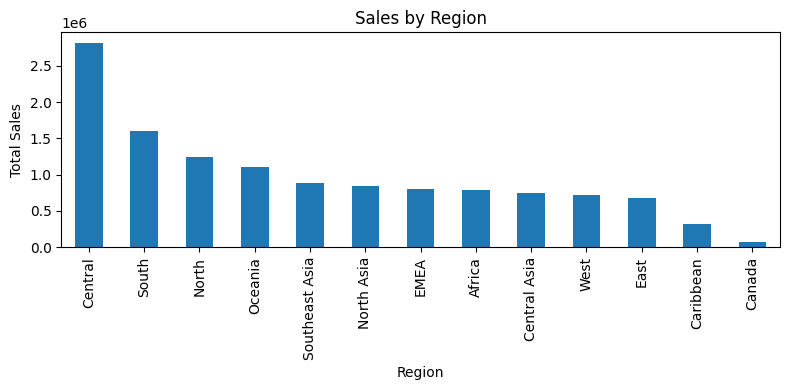

In [11]:
#Sales by Region
sales_region = df2.groupby("Region")["Sales"].sum().sort_values(ascending=False)
sales_region.plot(kind="bar", title="Sales by Region", figsize=(8,4))
plt.ylabel("Total Sales")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

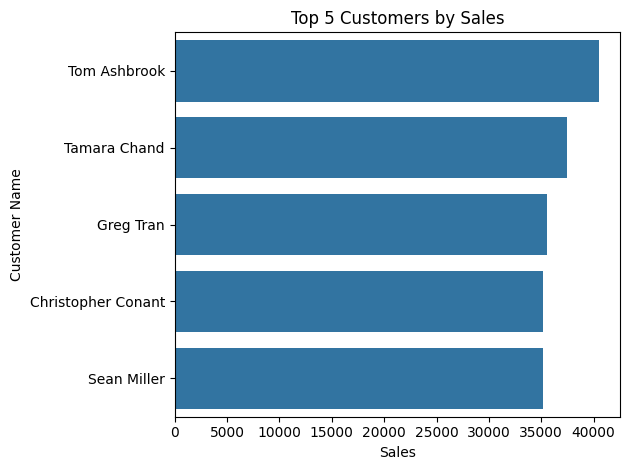

In [12]:
#Top 5 customers by sales
top_customers = df2.groupby("Customer Name")["Sales"].sum().nlargest(5)
sns.barplot(x=top_customers.values, y=top_customers.index)
plt.title("Top 5 Customers by Sales")
plt.xlabel("Sales")
plt.tight_layout()
plt.show()

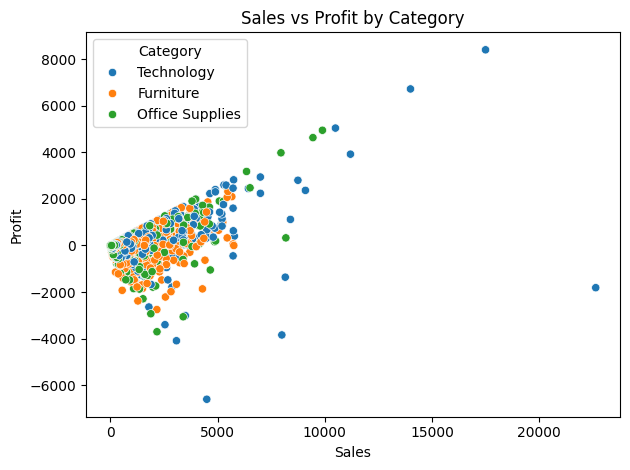

In [13]:
#Sales vs Profit scatterplot
sns.scatterplot(data=df2, x="Sales", y="Profit", hue="Category")
plt.title("Sales vs Profit by Category")
plt.tight_layout()
plt.show()

# Results
- Identified high-value customers and regions with the highest sales
- Enabled exploratory filtering for business insights

### Conclusion

This dashboard allows business users to interactively explore key metrics like **total sales**, **profits**, and **top-performing customers** using filters.  
Streamlit's simplicity and flexibility make this a powerful tool for business intelligence and decision-making.